In [ ]:
# connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import itertools

In [ ]:
# reading the train dataset
train_df = pd.read_csv('/content/drive/MyDrive/NLP/data/hindi-train.csv', sep='\t',encoding='utf-8',header=None, names=['label','text'])
train_df.head()

label                                               text
0     india  मेट्रो की इस लाइन के चलने से दक्षिणी दिल्ली से...
1  pakistan  नेटिजन यानि इंटरनेट पर सक्रिय नागरिक अब ट्विटर...
2      news  इसमें एक फ़्लाइट एटेनडेंट की मदद की गुहार है औ...
3     india  प्रतीक खुलेपन का, आज़ाद ख्याली का और भीड़ से अ...
4     india  ख़ासकर पिछले 10 साल तक प्रधानमंत्री रहे मनमोहन...

In [ ]:
  # reading the test dataset
test_df = pd.read_csv('/content/drive/MyDrive/NLP/data/hindi-test.csv',sep='\t',encoding='utf-8',header=None, names=['label','text'])
test_df.head()

label                                               text
0          india  बुधवार को राज्य सभा में विपक्ष के सवालों के जव...
1          india  लखनऊ स्थित पत्रकार समीरात्मज मिश्र को बुलंदशहर...
2          india  लगभग 1300 हेक्टेयर ज़मीन का अधिग्रहण किया जा च...
3  international  हालांकि उनके अंगरक्षकों को बमों को जाम करने वा...
4          india  आयोग का कहना है कि इस तरह के परीक्षण से महिलाओ...

In [ ]:
# printing the number of rows in training and testing set
print(len(train_df))
print(len(test_df))

3468
867


In [ ]:
# printing the types of classes and their count
train_df['label'].value_counts()

india              1390
international       904
entertainment       285
sport               258
news                230
science             194
business             54
pakistan             43
southasia            42
institutional        19
social               18
china                14
multimedia           12
learningenglish       5
Name: label, dtype: int64

In [ ]:
# printing the types of classes and their count
test_df['label'].value_counts()

india              357
international      212
sport               73
entertainment       71
science             61
news                49
southasia           10
pakistan             8
business             7
social               6
china                5
institutional        4
learningenglish      3
multimedia           1
Name: label, dtype: int64

In [ ]:
# checking for null values in the training set
# df_new = df[df['ColumnName'].notnull()]
train_df = train_df[train_df['text'].notnull()]
train_df.isnull().sum()

label    0
text     0
dtype: int64

In [ ]:
# checking for null values in the testing set
test_df = test_df[test_df['text'].notnull()]
test_df.isnull().sum()

label    0
text     0
dtype: int64

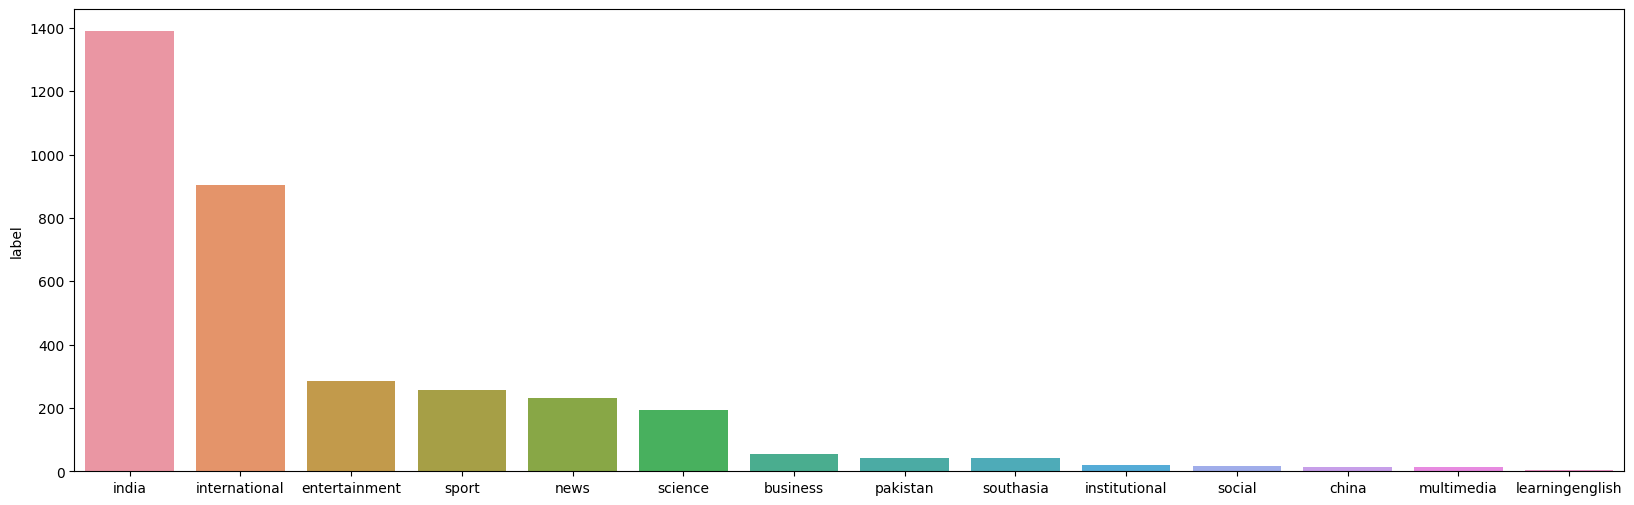

In [ ]:
#plotting bar graph for number of instances in each class of the training set
plt.figure(figsize = (20, 6))
train_data = train_df.label.value_counts()
sns.barplot(y = train_data, x = train_data.index, orient = 'v')
plt.show()

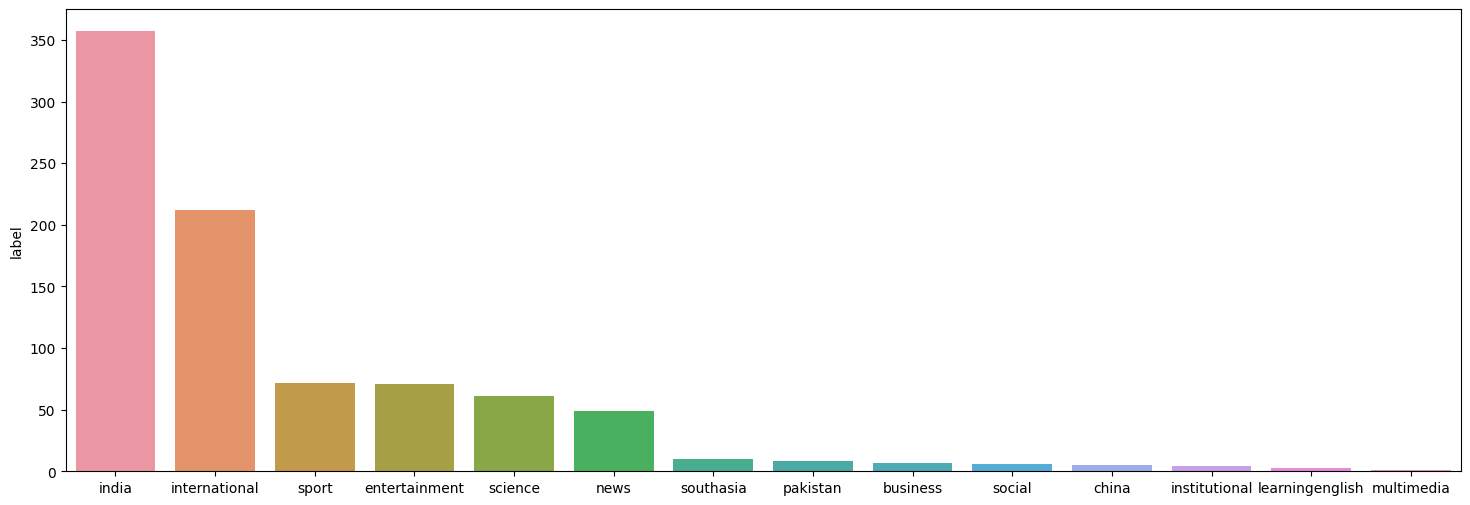

In [ ]:
#plotting bar graph for number of instances in each class of the testing set
plt.figure(figsize = (18, 6))
test_data = test_df.label.value_counts()
sns.barplot(y = test_data, x = test_data.index, orient = 'v')
plt.show()

In [ ]:
# printing the top 20 words in the training dataset
x_train = train_df.iloc[:, 1]
y_train = train_df.iloc[:, 0]
top_words_train = {}
top_words_train_list = []
for i in x_train:
  i = i.split(' ')
  for j in i:
    if j not in top_words_train:
      top_words_train[j] = 0
    top_words_train[j] = top_words_train[j] + 1
for key, val in sorted(top_words_train.items(), key = lambda x: x[1], reverse = True)[1:21]:
  top_words_train_list.append(key)
for i, word in enumerate(top_words_train_list):
   print(str(i + 1) + '.' + word)
top_words_train = dict(sorted(top_words_train.items(), key = lambda item: item[1], reverse = True))

1.में
2.की
3.और
4.से
5.को
6.कि
7.का
8.ने
9.है
10.पर
11.भी
12.नहीं
13.एक
14.लिए
15.कर
16.है.
17.इस
18.हैं
19.ही
20.तो


In [ ]:
# priting the number of occurences of the top 20 words in the training dataset
print(top_words_train)

{'के': 70703, 'में': 52230, 'की': 41046, 'और': 30846, 'से': 30194, 'को': 29307, 'कि': 23900, 'का': 23306, 'ने': 21575, 'है': 20278, 'पर': 20094, 'भी': 17493, 'नहीं': 13425, 'एक': 12914, 'लिए': 11925, 'कर': 11051, 'है.': 10920, 'इस': 10316, 'हैं': 8984, 'ही': 8782, 'तो': 7923, 'ये': 6979, 'हो': 6661, 'हैं.': 6308, 'लेकिन': 5924, 'करने': 5755, 'किया': 5562, 'बाद': 5356, 'कहा': 5336, 'वो': 5301, 'गया': 5091, 'रहे': 5040, 'लोगों': 4533, 'अपने': 4430, 'तक': 4341, 'साथ': 4306, 'यह': 4278, 'हैं,': 4268, 'हुए': 4236, 'कुछ': 3987, 'जो': 3968, 'सकते': 3950, 'था': 3861, 'आप': 3833, 'साल': 3823, 'रहा': 3804, 'पहले': 3797, 'है,': 3775, 'बात': 3669, 'रही': 3658, 'उन्हें': 3647, 'कोई': 3588, 'उनके': 3576, 'जा': 3538, 'उन्होंने': 3538, 'सरकार': 3395, 'वाले': 3300, 'दिया': 3265, 'तरह': 3194, 'अपनी': 3074, 'लोग': 3052, 'भारत': 3044, 'कहना': 2882, 'अब': 2879, 'करते': 2856, 'किसी': 2830, 'कहते': 2827, 'जब': 2822, 'गए': 2777, 'या': 2762, 'कई': 2746, 'गई': 2720, 'होने': 2585, 'काम': 2563, 'उनकी': 2539, 'हमे

In [ ]:
# printing the top 20 words in the testing dataset
x_test = test_df.iloc[:, 1]
y_test = test_df.iloc[:, 0]
top_words_test = {}
top_words_test_list = []
for i in x_test:
  i = i.split(' ')
  for j in i:
    if j not in top_words_test:
      top_words_test[j] = 0
    top_words_test[j] = top_words_test[j] + 1
for key, val in sorted(top_words_test.items(), key = lambda x: x[1], reverse = True)[1:21]:
  top_words_test_list.append(key)
for i, word in enumerate(top_words_test_list):
   print(str(i + 1) + '.' + word)
top_words_test = dict(sorted(top_words_test.items(), key = lambda item: item[1], reverse = True))

1.में
2.की
3.और
4.से
5.को
6.कि
7.का
8.ने
9.पर
10.है
11.भी
12.नहीं
13.एक
14.लिए
15.कर
16.है.
17.इस
18.हैं
19.ही
20.तो


In [ ]:
# priting the number of occurences of the top 20 words in the testing dataset
print(top_words_test)

{'के': 17727, 'में': 13059, 'की': 9728, 'और': 7875, 'से': 7484, 'को': 7031, 'कि': 5781, 'का': 5720, 'ने': 5257, 'पर': 5045, 'है': 4838, 'भी': 4229, 'नहीं': 3268, 'एक': 3251, 'लिए': 3117, 'कर': 2900, 'है.': 2712, 'इस': 2472, 'हैं': 2291, 'ही': 2179, 'तो': 2019, 'हैं.': 1698, 'ये': 1674, 'हो': 1663, 'लेकिन': 1468, 'करने': 1445, 'बाद': 1429, 'वो': 1352, 'किया': 1326, 'रहे': 1284, 'कहा': 1252, 'हैं,': 1246, 'गया': 1206, 'लोगों': 1143, 'सकते': 1104, 'साथ': 1090, 'अपने': 1083, 'हुए': 1083, 'यह': 1043, 'था': 1043, 'तक': 1037, 'जो': 1006, 'आप': 989, 'पहले': 981, 'उन्होंने': 980, 'कुछ': 932, 'साल': 923, 'लोग': 911, 'उन्हें': 902, 'उनके': 888, 'बात': 883, 'रहा': 874, 'वाले': 867, 'अपनी': 859, '': 857, 'रही': 855, 'है,': 854, 'कोई': 852, 'जा': 827, 'तरह': 813, 'दिया': 812, 'अब': 772, 'करते': 766, 'काम': 760, 'कहना': 760, 'सरकार': 757, 'कहते': 742, 'भारत': 737, 'गए': 703, 'जब': 700, 'कई': 686, 'किसी': 673, 'हमें': 665, 'या': 647, 'उनकी': 646, 'होने': 646, 'था.': 634, 'गई': 627, 'पार्टी': 615, 'बहु

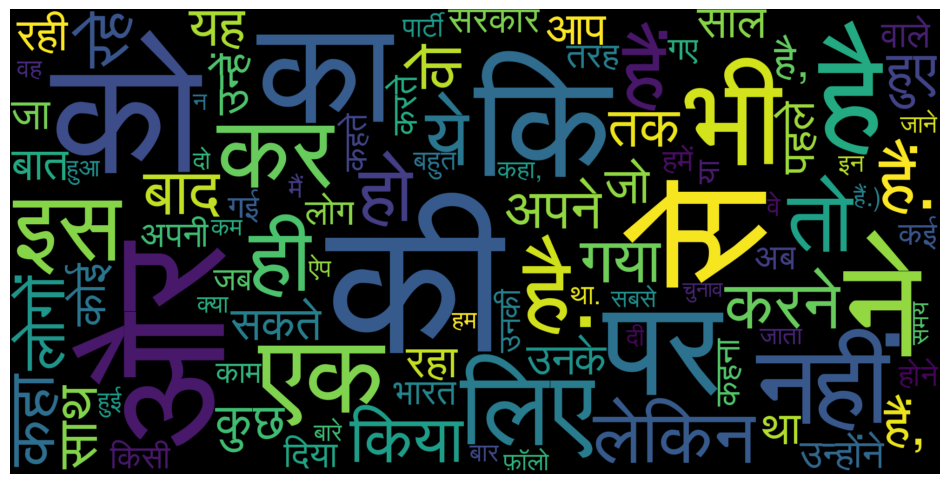

In [ ]:
# plotting word cloud for the headline in training set
train_df_dict = dict(itertools.islice(top_words_train.items(), 2, 103))
font = '/content/drive/MyDrive/NLP/data/gargi.ttf'
wordcloud = WordCloud(width = 2000, height = 1000, max_font_size = 400, font_path = font).generate_from_frequencies(train_df_dict)
plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

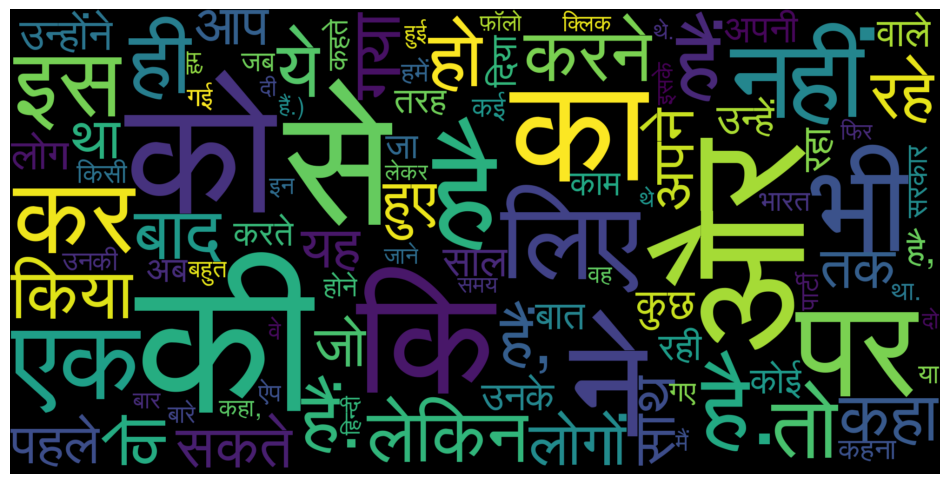

In [ ]:
# plotting word cloud for the headline in testing set
test_df_dict = dict(itertools.islice(top_words_test.items(), 2, 103))
font = '/content/drive/MyDrive/NLP/data/gargi.ttf'
wordcloud = WordCloud(width = 2000, height = 1000, max_font_size = 400, font_path = font).generate_from_frequencies(test_df_dict)
plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [ ]:
list(train_df['text'].values)

['मेट्रो की इस लाइन के चलने से दक्षिणी दिल्ली से नोएडा जाने का समय काफी कम हो जाएगा और यात्रियों को राजीव चौक या मंडी हाउस से होकर नहीं जाना पड़ेगा.लेकिन, यह मजेंटा लाइन इसलिए भी महत्वपूर्ण है क्योंकि इस पर ड्राइवलैस यानी बिना ड्राइवर वाली मेट्रो चलाने की योजना है. ऐसा भारत में पहली बार होगा जब कोई मेट्रो बिना ड्राइवर के चलाई जाएगी. मेट्रो के तीसरे फेज में भारत में पहली बार ड्राइवरलेस तकनीक आएगी लेकिन दुनिया भर में कई देशों में ड्राइवरलेस मेट्रो पहले से ही चलती हैं. इन देशों में ड्राइवरलेस मेट्रो सफल भी रही हैं. दक्षिण कोरिया की राजधानी सोल में ड्राइवलेस ट्रेन कामयाबी से चल रही है. ये मेट्रो ज़मीन के नीचे चलती है इसमें ड्राइवर का केबिन भी नहीं होता है. यूरोप में डेनमार्क, स्पेन, इटली, फ्रांस, जर्मनी, हंगरी, स्विट्जरलैंड और ब्रिटेन में भी ड्राइवरलैस मेट्रो चलती है. इन देशों में एक से ज़्यादा शहरों में भी ऐसी मेट्रो चलाई जाती है. इनके अलावा अमेरिका और कनाडा में भी ड्राइवरलेस ट्रेन चलती है. वहीं, ब्राजील, पेरू और चाइल में भी इस तरह की मेट्रो काफ़ी पहले आ चुकी है. भारत के पड़ोसी देश चीन मे

<Axes: ylabel='Frequency'>

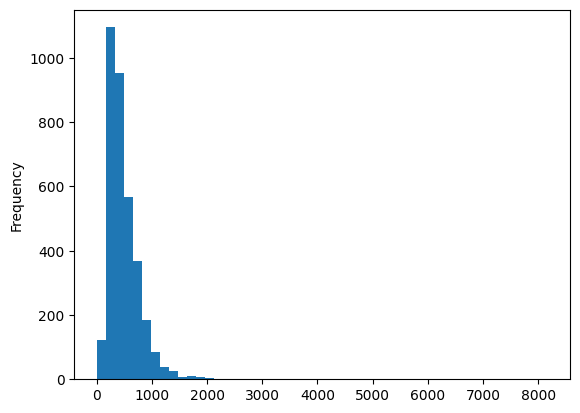

In [ ]:
# plotting length of sentences in headline of training set
x_train = list(train_df['text'].values)
train_length = list(map(lambda x: len(x.split(' ')), x_train))
train_df['length'] = train_length
train_df['length'].plot(bins = 50, kind = 'hist')

<Axes: ylabel='Frequency'>

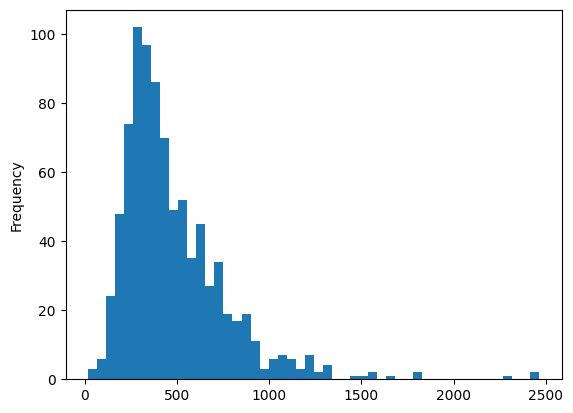

In [ ]:
# plotting length of sentences in headline of testing set
x_test = list(test_df['text'].values)
test_length = list(map(lambda x: len(x.split(' ')), x_test))
test_df['length'] = test_length
test_df['length'].plot(bins = 50, kind = 'hist')